In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
# read in csv

df = pd.read_csv('metrics raw data.csv')
df.head(20)

,query,warehouse,execution_time,bytes_scanned,rows
0,Full Table Scan,Iceberg,345,NaN,1
1,Full Table Scan,Native,192,NaN,1
2,Partition Pruning,Iceberg,1600,NaN,1
3,Partition Pruning,Native,1100,NaN,1
4,Aggregation,Iceberg,1700,NaN,11
5,Aggregation,Native,765,NaN,6
6,Join Query,Iceberg,1200,1.5,6
7,Join Query,Native,790,57900.0,6
8,Top N,Iceberg,220,NaN,5
9,Top N,Native,447,NaN,3


In [3]:
queries = df['query'].unique()
warehouse = df['warehouse'].unique()

print(queries)

['Full Table Scan' 'Partition Pruning' 'Aggregation' 'Join Query' 'Top N'
 'Multi-level Join with Aggregation' 'Window Function for Ranking'
 'Subquery for Conditional Aggregation'
 'CTE with Filtering and Aggregation' 'Conditional Aggregation'
 'Nested CTEs with Join and Aggregation']


In [4]:
df['execution_time_ms'] = df['execution_time']
df['execution_time'] = df['execution_time_ms'] / 1000
df.head()

,query,warehouse,execution_time,bytes_scanned,rows,execution_time_ms
0,Full Table Scan,Iceberg,0.345,NaN,1,345
1,Full Table Scan,Native,0.192,NaN,1,192
2,Partition Pruning,Iceberg,1.600,NaN,1,1600
3,Partition Pruning,Native,1.100,NaN,1,1100
4,Aggregation,Iceberg,1.700,NaN,11,1700


In [5]:
native_df = df[df['warehouse'] == "Native"]
iceberg_df = df[df['warehouse'] == "Iceberg"]

In [6]:
execution_times_native = native_df['execution_time'].values
execution_times_iceberg = iceberg_df['execution_time'].values
execution_times = df['execution_time'].values

[0.175 1.175 2.175]
[-0.175  0.825  1.825]


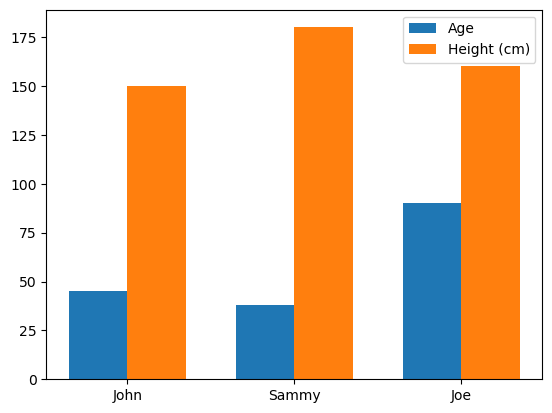

In [7]:
import numpy as np, matplotlib.pyplot as plt

names = ['John', 'Sammy', 'Joe']; ages = [45, 38, 90]; heights = [150, 180, 160]
x = np.arange(len(names)); w = 0.35

print(x + w/2)
print(x - w/2)

plt.bar(x - w/2, ages, w, label='Age')
plt.bar(x + w/2, heights, w, label='Height (cm)')
plt.xticks(x, names)
plt.legend()
plt.show()

(18.35, 18.43, 14.98)


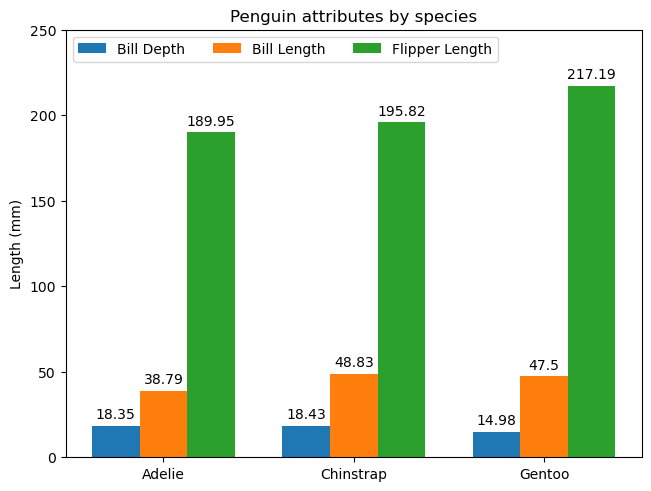

In [8]:
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

species = ("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}

print(penguin_means['Bill Depth'])

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show()

['Full Table\nScan' 'Partition\nPruning' 'Aggregation' 'Join Query'
 'Top N' 'Multi-level\nJoin with\nAggregation'
 'Window\nFunction for\nRanking' 'Subquery for\nConditional\nAggregation'
 'CTE with\nFiltering\nand\nAggregation' 'Conditional\nAggregation'
 'Nested CTEs\nwith Join\nand\nAggregation']


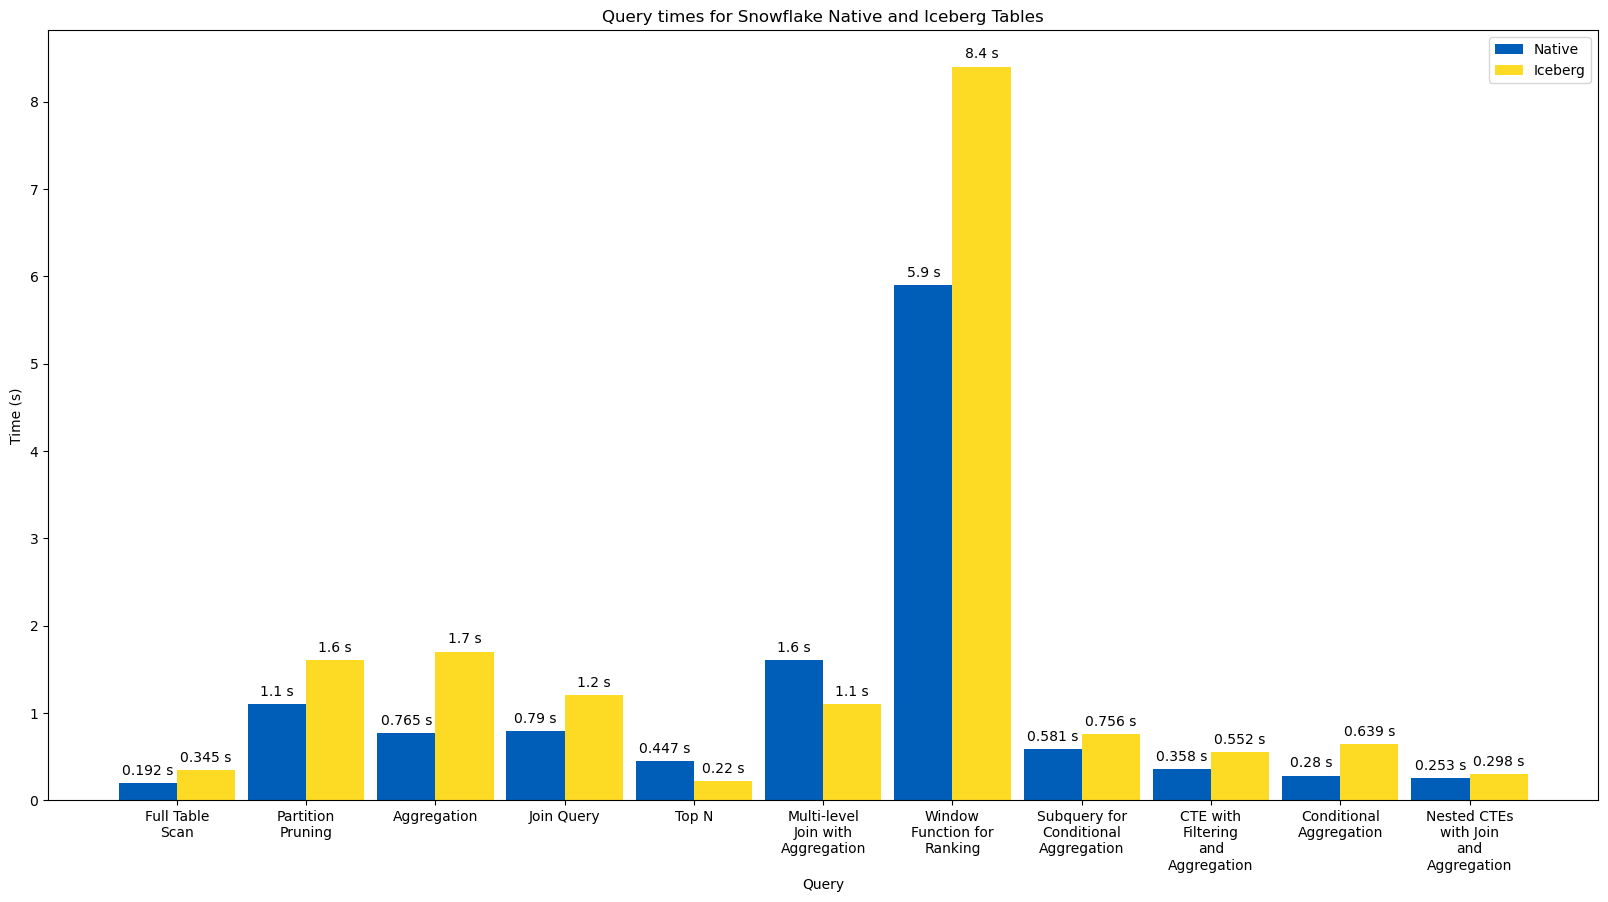

In [13]:
from textwrap import wrap
df['query'] = ['\n'.join(wrap(x, 12)) for x in df['query']]

queries = df['query'].unique()
print(queries)

x = np.arange(len(queries)); w = 0.45

plt.figure(figsize=(20, 10))
bar = plt.bar(x - w/2, execution_times_native, w, label='Native', color='#005EB8')
plt.bar_label(bar, padding=4, fmt = lambda x: f'{x} s')

bar = plt.bar(x + w/2, execution_times_iceberg, w, label='Iceberg', color='#FDDA24')
plt.bar_label(bar, padding=4, fmt = lambda x: f'{x} s')

plt.xticks(x, queries)
plt.yticks()
plt.xlabel("Query")
plt.ylabel("Time (s)")
plt.title("Query times for Snowflake Native and Iceberg Tables")
plt.legend()

plt.show()

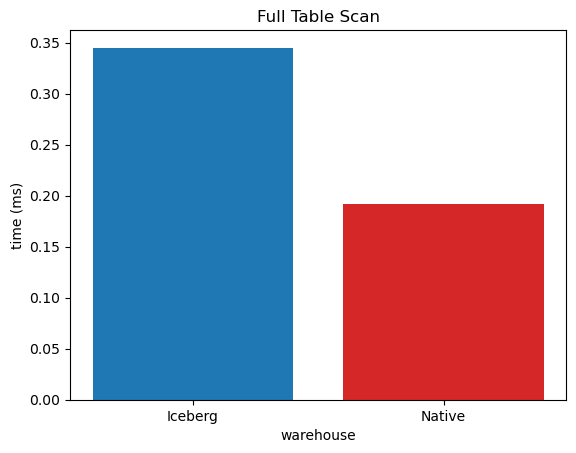

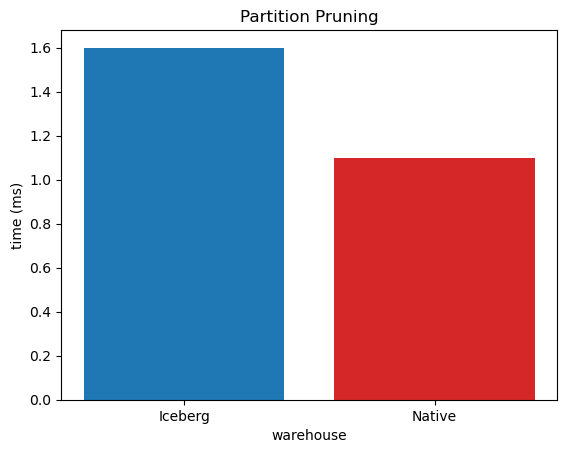

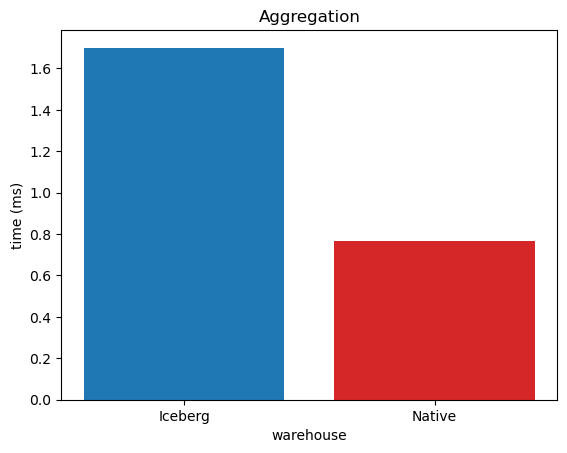

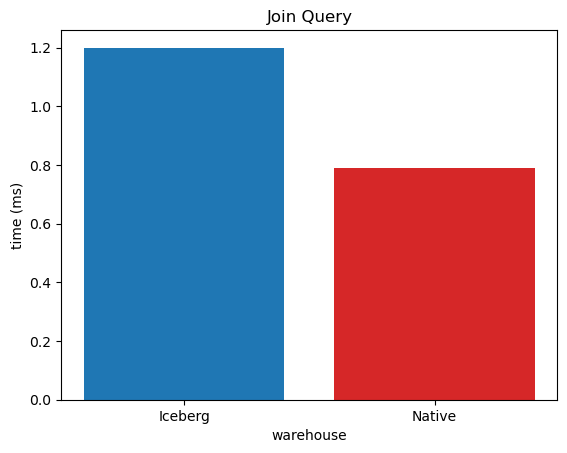

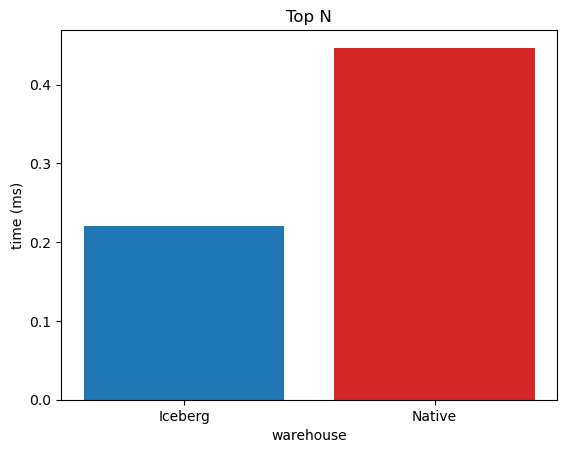

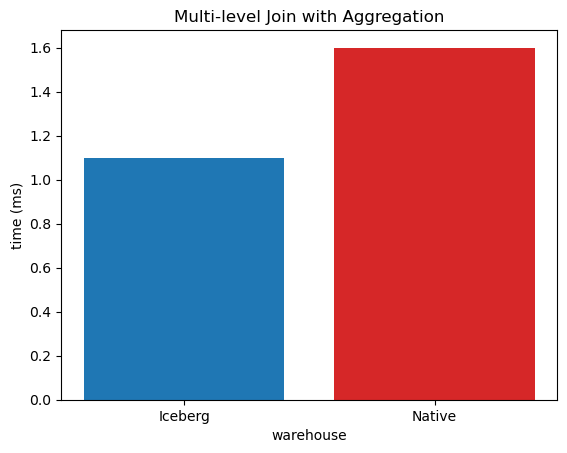

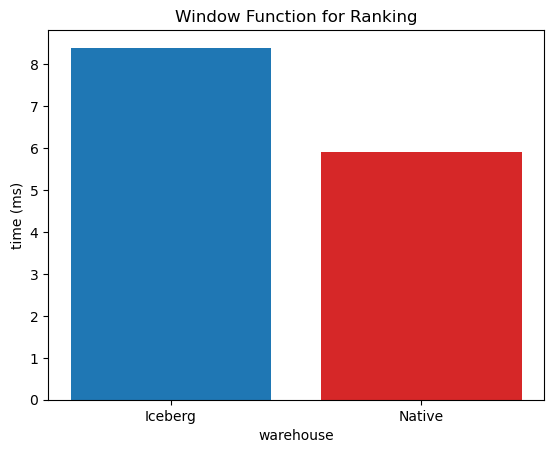

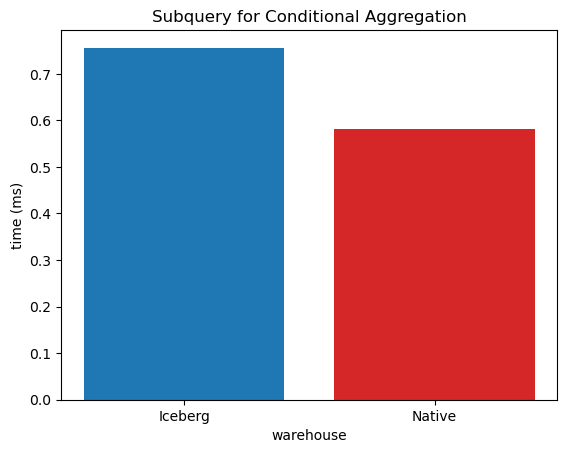

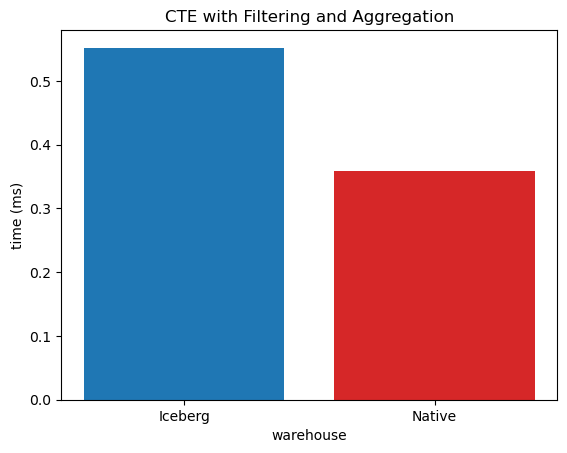

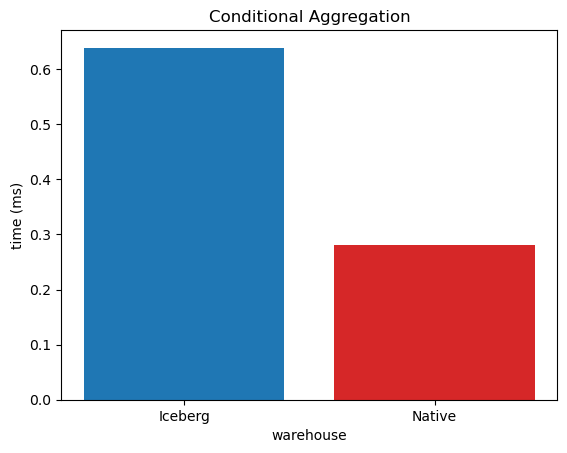

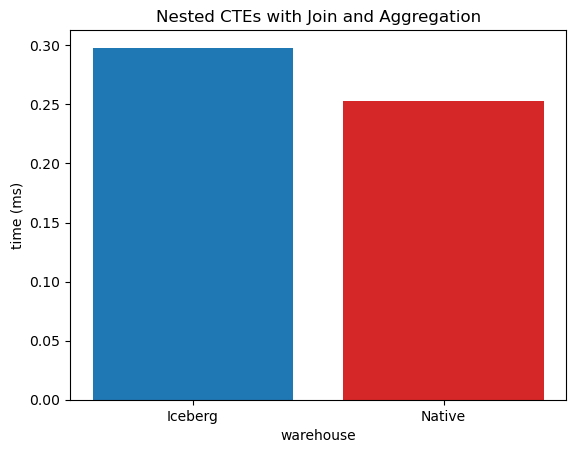

<Figure size 640x480 with 0 Axes>

In [ ]:
bar_colors = ['tab:blue', 'tab:red']

for query in queries:
    df_subset = df[df['query'] == query]
    df_subset.head()
    plt.bar(df_subset['warehouse'], df_subset['execution_time'], color=bar_colors)
    # plt.ylim(0, df_subset['executions_time'].max)
    plt.xlabel("warehouse")
    plt.ylabel("time (ms)")
    plt.title(query)
    plt.show()
    plt.savefig('figures/' + query + '_execution_time.png')

In [ ]:
df[df['bytes_scanned'].notna()]

queries_bytes = df[df['bytes_scanned'].notna()]['query'].unique()
warehouse_bytes = df['warehouse'].unique()

print(queries_bytes)

['Join Query' 'Multi-level Join with Aggregation'
 'Nested CTEs with Join and Aggregation']


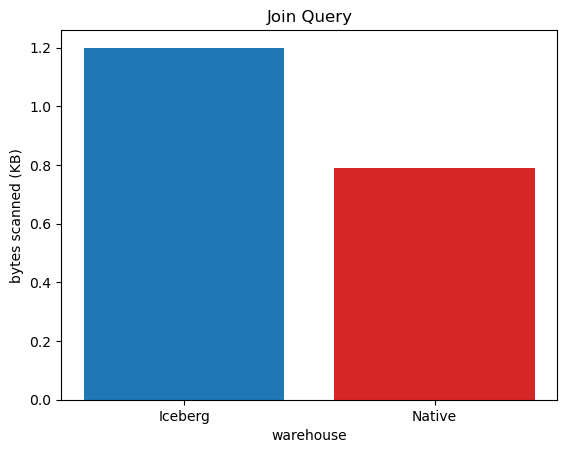

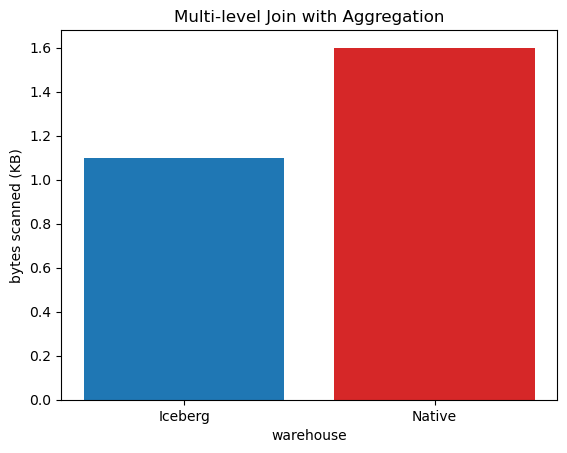

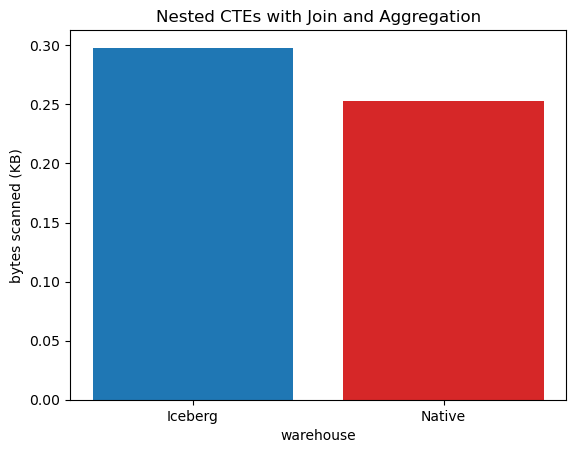

<Figure size 640x480 with 0 Axes>

In [ ]:
bar_colors = ['tab:blue', 'tab:red']

for query in queries_bytes:
    df_subset = df[df['query'] == query]
    df_subset.head()
    plt.bar(df_subset['warehouse'], df_subset['execution_time'], color=bar_colors)
    # plt.ylim(0, df_subset['executions_time'].max)
    plt.xlabel("warehouse")
    plt.ylabel("bytes scanned (KB)")
    plt.title(query)
    plt.show()
    plt.savefig('figures/' + query + '_bytes_scanned.png')